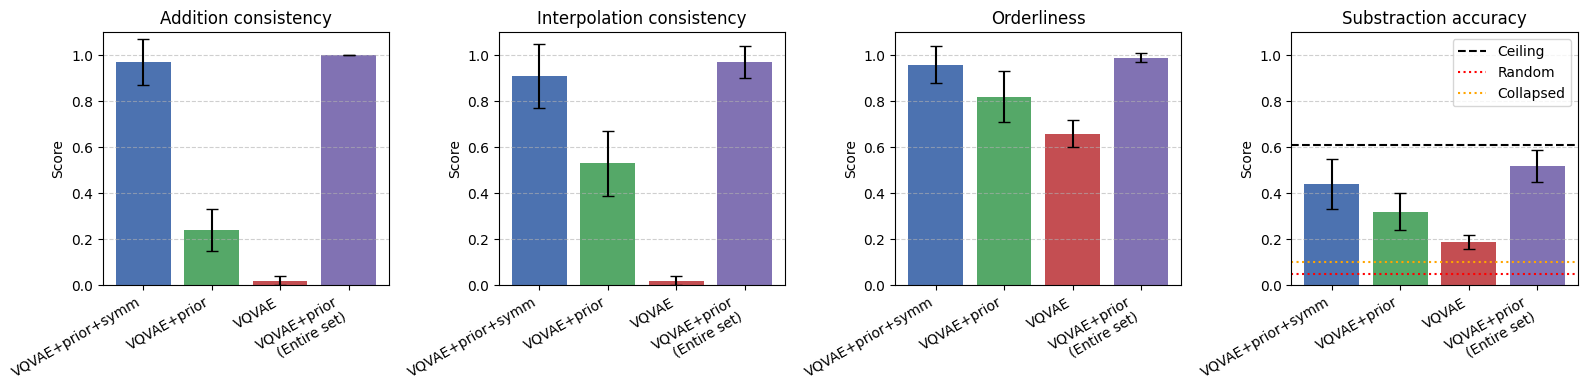

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
experiments = [
    "VQVAE+prior+symm",
    "VQVAE+prior",
    "VQVAE",
    "VQVAE+prior\n(Entire set)"
]

# 四个指标的均值与标准差
metrics = {
    "Addition consistency": ([0.97, 0.24, 0.02, 1.00], [0.10, 0.09, 0.02, 0.0]),
    "Interpolation consistency": ([0.91, 0.53, 0.02, 0.97], [0.14, 0.14, 0.02, 0.07]),
    "Orderliness": ([0.96, 0.82, 0.66, 0.99], [0.08, 0.11, 0.06, 0.02]),
    "Substraction accuracy": ([0.44, 0.32, 0.19, 0.52], [0.11, 0.08, 0.03, 0.07])
}

# 创建图
fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharey=False)

for ax, (metric, (means, stds)) in zip(axes, metrics.items()):
    x = np.arange(len(experiments))
    ax.bar(x, means, yerr=stds, capsize=4, color=['#4c72b0', '#55a868', '#c44e52', '#8172b3'])
    ax.set_xticks(x)
    ax.set_xticklabels(experiments, rotation=30, ha='right')
    ax.set_ylim(0, 1.1)
    ax.set_title(metric)
    ax.set_ylabel("Score")
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    if metric == "Substraction accuracy":
        ax.axhline(0.61, color='black', linestyle='--', label='Ceiling')
        ax.axhline(0.05, color='red', linestyle=':', label='Random')
        ax.axhline(0.10, color='orange', linestyle=':', label='Collapsed')
        ax.legend()

plt.tight_layout()
plt.show()
